<a href="https://colab.research.google.com/github/amirfarhat/cset-dos-flooding/blob/main/cset_slides_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_colwidth = 200
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.rcParams['figure.dpi']  = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size']        = '18'
plt.rcParams['lines.linewidth']  = 3
plt.rcParams['lines.markersize'] = 9

MB_TO_B = 1e6
KB_TO_B = 1e3
B_TO_B = 1

In [15]:
decode_time_records = [
  {"attack_volume": "High",   "observer": "Proxy", "average_decode_time_sec": 166},
  {"attack_volume": "Moderate", "observer": "Proxy", "average_decode_time_sec": 117},
  {"attack_volume": "None",    "observer": "Proxy", "average_decode_time_sec": 15},
  
  {"attack_volume": "High",   "observer": "Server", "average_decode_time_sec": 100},
  {"attack_volume": "Moderate", "observer": "Server", "average_decode_time_sec": 87},
  {"attack_volume": "None",    "observer": "Server", "average_decode_time_sec": 13},

  {"attack_volume": "High",   "observer": "Attacker", "average_decode_time_sec": 128},
  {"attack_volume": "Moderate", "observer": "Attacker", "average_decode_time_sec": 76},
  {"attack_volume": "None",   "observer": "Attacker", "average_decode_time_sec": 0},
  # Low volume has no attack.

  {"attack_volume": "High",   "observer": "Receiver", "average_decode_time_sec": 101},
  {"attack_volume": "Moderate", "observer": "Receiver", "average_decode_time_sec": 9},
  {"attack_volume": "None",    "observer": "Receiver", "average_decode_time_sec": 10},

  {"attack_volume": "High",   "observer": "Client", "average_decode_time_sec": 11},
  {"attack_volume": "Moderate", "observer": "Client", "average_decode_time_sec": 11},
  {"attack_volume": "None",    "observer": "Client", "average_decode_time_sec": 11},
]

decode_time_df = pd.DataFrame.from_records(decode_time_records)
decode_time_df

,attack_volume,observer,average_decode_time_sec
0,High,Proxy,166
1,Moderate,Proxy,117
2,None,Proxy,15
3,High,Server,100
4,Moderate,Server,87
5,None,Server,13
6,High,Attacker,128
7,Moderate,Attacker,76
8,None,Attacker,0
9,High,Receiver,101


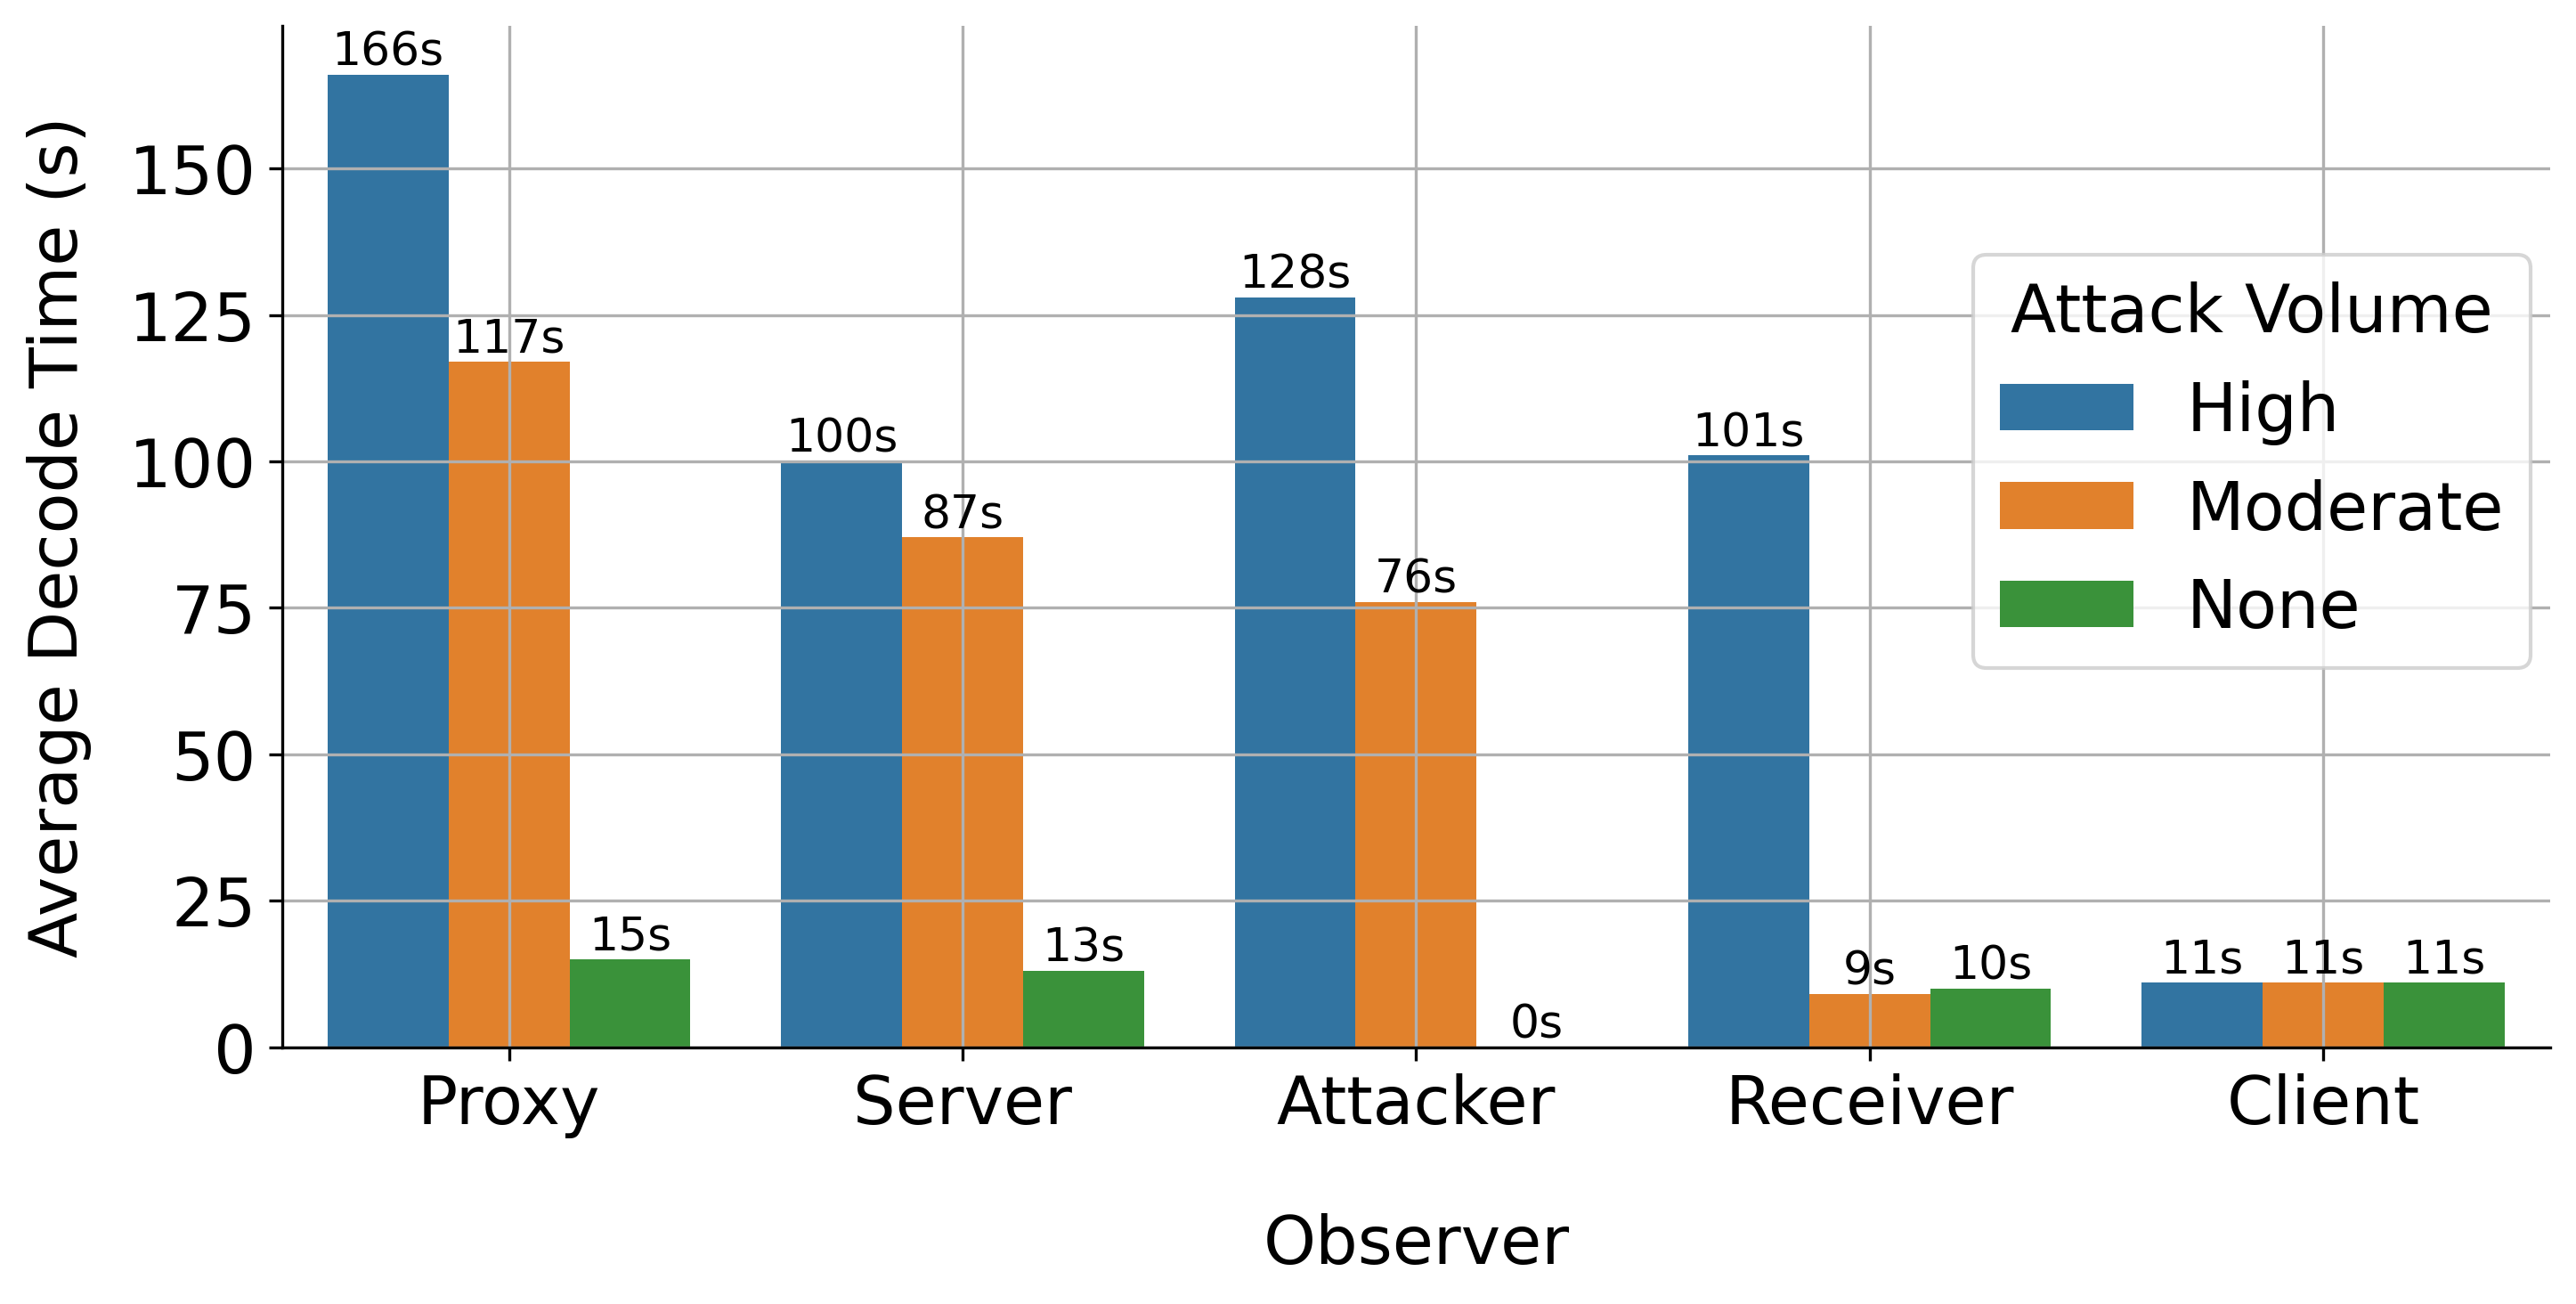

In [16]:
df = decode_time_df

g = sns.catplot(
  data=df,
  kind="bar",
  x="observer",
  y="average_decode_time_sec",
  hue="attack_volume",
  aspect=2,
)

g.set_xlabels("Observer", labelpad=20)
g.set_ylabels("Average Decode Time (s)", labelpad=10)
g.legend.set_title("Attack Volume")

sns.move_legend(
  g,
  "upper center",
  bbox_to_anchor=(0.725, 0.8),
  ncol=1,
  frameon=True,
)

axes = [ g.axes[0, 0] ]
for i, ax in enumerate(axes):
  ax.grid(True, axis="both")
  for container in ax.containers:
    ax.bar_label(container, fmt="%ds", padding=0, fontsize="x-small")

plt.show()

In [4]:
storage_engine_table_size_records = [
  {"storage_engine": "PostgreSQL", "table_name": "event",         "storage_space_bytes": 1_394 * MB_TO_B},
  {"storage_engine": "PostgreSQL", "table_name": "node_metric",   "storage_space_bytes": 4_552 * KB_TO_B},
  {"storage_engine": "PostgreSQL", "table_name": "message",       "storage_space_bytes": 24    * KB_TO_B},
  {"storage_engine": "PostgreSQL", "table_name": "deployed_node", "storage_space_bytes": 32    * KB_TO_B},
  {"storage_engine": "PostgreSQL", "table_name": "experiment",    "storage_space_bytes": 32    * KB_TO_B},
  {"storage_engine": "PostgreSQL", "table_name": "coap_message",  "storage_space_bytes": 32    * KB_TO_B},
  {"storage_engine": "PostgreSQL", "table_name": "node",          "storage_space_bytes": 32    * KB_TO_B},
  {"storage_engine": "PostgreSQL", "table_name": "http_message",  "storage_space_bytes": 32    * KB_TO_B},

  {"storage_engine": "ClickHouse", "table_name": "event",         "storage_space_bytes": 207.1 * MB_TO_B},
  {"storage_engine": "ClickHouse", "table_name": "node_metric",   "storage_space_bytes": 135.7 * KB_TO_B},
  {"storage_engine": "ClickHouse", "table_name": "message",       "storage_space_bytes": 1.29  * KB_TO_B},
  {"storage_engine": "ClickHouse", "table_name": "deployed_node", "storage_space_bytes": 945   *  B_TO_B},
  {"storage_engine": "ClickHouse", "table_name": "experiment",    "storage_space_bytes": 3.41  * KB_TO_B},
  {"storage_engine": "ClickHouse", "table_name": "coap_message",  "storage_space_bytes": 357   *  B_TO_B},
  {"storage_engine": "ClickHouse", "table_name": "node",          "storage_space_bytes": 382   *  B_TO_B},
  {"storage_engine": "ClickHouse", "table_name": "http_message",  "storage_space_bytes": 569   *  B_TO_B},
]

table_metadata_records = [
  {"table_name": "event",         "row_count": 27_994_110, "pgsql_storage_space_bytes": 1_394 * MB_TO_B},
  {"table_name": "node_metric",   "row_count": 45_935,     "pgsql_storage_space_bytes": 4_552 * KB_TO_B},
  {"table_name": "message",       "row_count": 99,         "pgsql_storage_space_bytes": 24    * KB_TO_B},
  {"table_name": "deployed_node", "row_count": 60,         "pgsql_storage_space_bytes": 32    * KB_TO_B},
  {"table_name": "experiment",    "row_count": 12,         "pgsql_storage_space_bytes": 32    * KB_TO_B},
  {"table_name": "coap_message",  "row_count": 6,          "pgsql_storage_space_bytes": 32    * KB_TO_B},
  {"table_name": "node",          "row_count": 5,          "pgsql_storage_space_bytes": 32    * KB_TO_B},
  {"table_name": "http_message",  "row_count": 2,          "pgsql_storage_space_bytes": 32    * KB_TO_B},
]

storage_engine_table_size_df = pd.DataFrame.from_records(storage_engine_table_size_records)
table_metadata_df = pd.DataFrame.from_records(table_metadata_records)

# Create agnostic names for the database tables.
database_table_name_map_readable = {
  "event"         : "Table A",
  "node_metric"   : "Table B",
  "deployed_node" : "Table C",
  "experiment"    : "Table D",
  "coap_message"  : "Table E",
  "node"          : "Table F",
  "http_message"  : "Table G",
  "message"       : "Table H",
}

# Combine the storage engine table size with the table row counts.
table_size_df = (
  storage_engine_table_size_df
  .merge(
    table_metadata_df,
    on="table_name",
    how="left",
  )
)

table_size_df["postgresql_total_bytes"] = 1.398736e+09
table_size_df["clickhouse_total_bytes"] = 2.072427e+08
table_size_df.loc[(table_size_df["storage_engine"] == "PostgreSQL"), "postgresql_pct_of_total"] = 100 * table_size_df["storage_space_bytes"] / 1.398736e+09
table_size_df.loc[(table_size_df["storage_engine"] == "ClickHouse"), "clickhouse_pct_of_total"] = 100 * table_size_df["storage_space_bytes"] / 2.072427e+08

table_size_df["storage_space_megabytes"] = table_size_df["storage_space_bytes"] * (1 / MB_TO_B)
table_size_df["storage_space_kilobytes"] = table_size_df["storage_space_bytes"] * (1 / KB_TO_B)

# Create a total row and append it to the table sizes.
total_df = (
  table_size_df
  .groupby(
    by=["storage_engine"]
  )
  .agg(
    storage_space_bytes=("storage_space_bytes", "sum"),
    row_count=("row_count", "sum"),
    storage_space_megabytes=("storage_space_megabytes", "sum"),
    storage_space_kilobytes=("storage_space_kilobytes", "sum"),
    pgsql_storage_space_bytes=("pgsql_storage_space_bytes", "sum"),
  )
  .reset_index()
)
total_df["table_name"] = "Total"

table_size_df = (
  table_size_df.append(total_df)
  .reset_index().drop(columns=["index"])
  .sort_values(by=["storage_engine", "table_name"])
  .reset_index().drop(columns=["index"])
)

table_size_df["pct_of_postgres"] = 100 * (table_size_df["storage_space_bytes"] / table_size_df["pgsql_storage_space_bytes"])
table_size_df["pct_reduction"] = 100 - table_size_df["pct_of_postgres"]

table_size_df["readable_table_name"] = table_size_df["table_name"].replace(database_table_name_map_readable)

table_size_df["readable_storage_space"] = table_size_df["storage_space_megabytes"].astype(int).astype(str) + " MB"
table_size_df.loc[(table_size_df["storage_space_megabytes"] < 1), "readable_storage_space"] = table_size_df["storage_space_kilobytes"].astype(int).astype(str) + " KB"
table_size_df.loc[(table_size_df["storage_space_kilobytes"] < 1), "readable_storage_space"] = table_size_df["storage_space_bytes"].astype(int).astype(str) + " B"

table_size_df

,storage_engine,table_name,storage_space_bytes,row_count,pgsql_storage_space_bytes,postgresql_total_bytes,clickhouse_total_bytes,postgresql_pct_of_total,clickhouse_pct_of_total,storage_space_megabytes,storage_space_kilobytes,pct_of_postgres,pct_reduction,readable_table_name,readable_storage_space
0,ClickHouse,Total,2.072427e+08,28040229,1.398736e+09,NaN,NaN,NaN,NaN,207.242653,207242.653,14.816424,85.183576,Total,207 MB
1,ClickHouse,coap_message,3.570000e+02,6,3.200000e+04,1.398736e+09,207242700.0,NaN,0.000172,0.000357,0.357,1.115625,98.884375,Table E,357 B
2,ClickHouse,deployed_node,9.450000e+02,60,3.200000e+04,1.398736e+09,207242700.0,NaN,0.000456,0.000945,0.945,2.953125,97.046875,Table C,945 B
3,ClickHouse,event,2.071000e+08,27994110,1.394000e+09,1.398736e+09,207242700.0,NaN,99.931144,207.100000,207100.000,14.856528,85.143472,Table A,207 MB
4,ClickHouse,experiment,3.410000e+03,12,3.200000e+04,1.398736e+09,207242700.0,NaN,0.001645,0.003410,3.410,10.656250,89.343750,Table D,3 KB
5,ClickHouse,http_message,5.690000e+02,2,3.200000e+04,1.398736e+09,207242700.0,NaN,0.000275,0.000569,0.569,1.778125,98.221875,Table G,569 B
6,ClickHouse,message,1.290000e+03,99,2.400000e+04,1.398736e+09,207242700.0,NaN,0.000622,0.001290,1.290,5.375000,94.625000,Table H,1 KB
7,ClickHouse,node,3.820000e+02,5,3.200000e+04,1.398736e+09,207242700.0,NaN,0.000184,0.000382,0.382,1.193750,98.806250,Table F,382 B
8,ClickHouse,node_metric,1.357000e+05,45935,4.552000e+06,1.398736e+09,207242700.0,NaN,0.065479,0.135700,135.700,2.981107,97.018893,Table B,135 KB
9,PostgreSQL,Total,1.398736e+09,28040229,1.398736e+09,NaN,NaN,NaN,NaN,1398.736000,1398736.000,100.000000,0.000000,Total,1398 MB


In [5]:
_df = (
  table_size_df[table_size_df["readable_table_name"] != "Total"]
  .groupby(
    by=["readable_table_name"]
  )
  .agg(
    postgresql_readable_storage_space=("readable_storage_space", "last"),
    postgresql_pct_of_total=("postgresql_pct_of_total", "last"),
    clickhouse_readable_storage_space=("readable_storage_space", "first"),
    clickhouse_pct_of_total=("clickhouse_pct_of_total", "last"),

    postgresql_pgsql_storage_space_bytes=("pgsql_storage_space_bytes", "last"),
    clickhouse_pgsql_storage_space_bytes=("pgsql_storage_space_bytes", "first"),
  )
  .reset_index()
  .sort_values(
    by=["postgresql_pct_of_total"],
    ascending=[False],
  )
  .drop(columns=["clickhouse_pgsql_storage_space_bytes", "postgresql_pgsql_storage_space_bytes"])
)

_df["postgresql_pct_of_total"] = _df["postgresql_pct_of_total"].round(2)
_df["clickhouse_pct_of_total"] = _df["clickhouse_pct_of_total"].round(2)

_df

,readable_table_name,postgresql_readable_storage_space,postgresql_pct_of_total,clickhouse_readable_storage_space,clickhouse_pct_of_total
0,Table A,1394 MB,99.66,207 MB,99.93
1,Table B,4 MB,0.33,135 KB,0.07
2,Table C,32 KB,0.00,945 B,0.00
3,Table D,32 KB,0.00,3 KB,0.00
4,Table E,32 KB,0.00,357 B,0.00
5,Table F,32 KB,0.00,382 B,0.00
6,Table G,32 KB,0.00,569 B,0.00
7,Table H,24 KB,0.00,1 KB,0.00


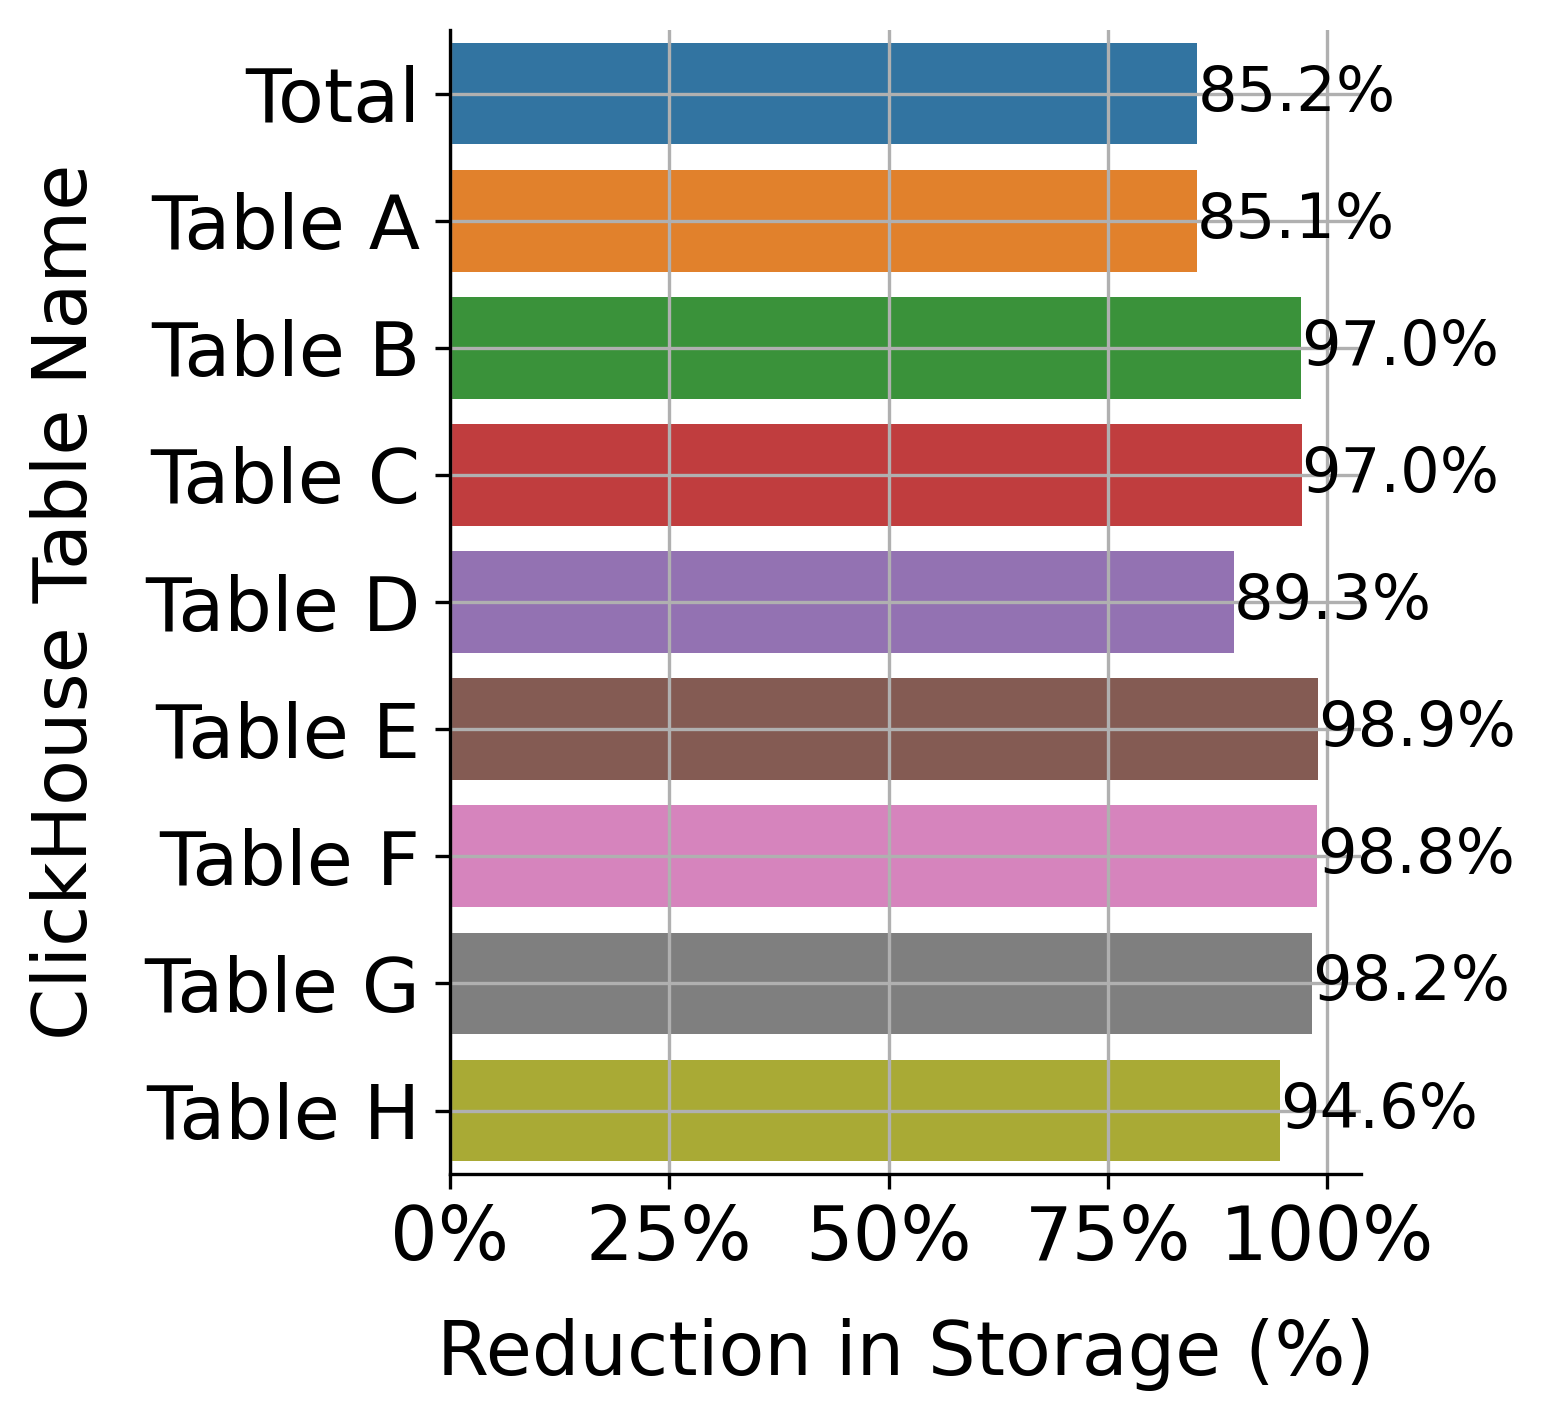

,storage_engine,table_name,storage_space_bytes,row_count,pgsql_storage_space_bytes,postgresql_total_bytes,clickhouse_total_bytes,postgresql_pct_of_total,clickhouse_pct_of_total,storage_space_megabytes,storage_space_kilobytes,pct_of_postgres,pct_reduction,readable_table_name,readable_storage_space,readable_pct_reduction
3,ClickHouse,event,207100000.0,27994110,1.394000e+09,1.398736e+09,207242700.0,NaN,99.931144,207.100000,207100.000,14.856528,85.143472,Table A,207 MB,85.14347202295552%
0,ClickHouse,Total,207242653.0,28040229,1.398736e+09,NaN,NaN,NaN,NaN,207.242653,207242.653,14.816424,85.183576,Total,207 MB,85.18357624312236%
4,ClickHouse,experiment,3410.0,12,3.200000e+04,1.398736e+09,207242700.0,NaN,0.001645,0.003410,3.410,10.656250,89.343750,Table D,3 KB,89.34375%
6,ClickHouse,message,1290.0,99,2.400000e+04,1.398736e+09,207242700.0,NaN,0.000622,0.001290,1.290,5.375000,94.625000,Table H,1 KB,94.625%
8,ClickHouse,node_metric,135700.0,45935,4.552000e+06,1.398736e+09,207242700.0,NaN,0.065479,0.135700,135.700,2.981107,97.018893,Table B,135 KB,97.0188927943761%
2,ClickHouse,deployed_node,945.0,60,3.200000e+04,1.398736e+09,207242700.0,NaN,0.000456,0.000945,0.945,2.953125,97.046875,Table C,945 B,97.046875%
5,ClickHouse,http_message,569.0,2,3.200000e+04,1.398736e+09,207242700.0,NaN,0.000275,0.000569,0.569,1.778125,98.221875,Table G,569 B,98.221875%
7,ClickHouse,node,382.0,5,3.200000e+04,1.398736e+09,207242700.0,NaN,0.000184,0.000382,0.382,1.193750,98.806250,Table F,382 B,98.80625%
1,ClickHouse,coap_message,357.0,6,3.200000e+04,1.398736e+09,207242700.0,NaN,0.000172,0.000357,0.357,1.115625,98.884375,Table E,357 B,98.884375%


In [13]:
df = (
  table_size_df[table_size_df["storage_engine"].isin(["ClickHouse"])]
  .sort_values(
    by=["pct_reduction"],
    ascending=[True],
  )
)

df["readable_pct_reduction"] = df["pct_reduction"].astype(str) + "%"

# Reorder Total.
table_order = df["readable_table_name"].tolist()
table_order.pop(table_order.index("Total"))
table_order = ["Total"] + sorted(table_order)
table_order

g = sns.catplot(
  data=df,
  kind="bar",
  y="readable_table_name",
  # x="readable_pct_reduction",
  x="pct_reduction",
  aspect=1,
  orient="h",
  order=table_order,
)

g.set_ylabels("ClickHouse Table Name", labelpad=10)
g.set_xlabels("Reduction in Storage (%)", labelpad=10)

g.set(
  xticks=np.arange(0, 101, 25)
)

axes = [ g.axes[0, 0] ]
axes[0].xaxis.set_major_formatter(mtick.PercentFormatter())
for i, ax in enumerate(axes):
  ax.grid(True, axis="both")
  for container in ax.containers:
    ax.bar_label(container, fmt="%0.1f%%", padding=0, fontsize="small")

plt.show()

df